In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from networkx.algorithms import bipartite
from tqdm import tqdm
#df = pd.read_excel('graph_測試.xlsx')
import pickle

In [3]:
df = pd.read_excel('patent_wipo16(11-20).xlsx')

In [82]:
invt_ID = df['invt_ID'].unique()
len(invt_ID)

93942

In [ ]:
df

In [2]:
df_original = pd.read_excel('patent_wipo16_ori.xlsx')

In [3]:
invt_ID = df_original['inventor_id'].unique()
len(invt_ID)

93942

In [5]:
import math
n = math.ceil(len(invt_ID))

In [6]:
df = df.dropna(how='all', axis=1)

In [6]:
#data is too big 拆成四個part跑(0,n),(n,2n),(2n,3n), (3n,len)
'''
inventor = []

for i in tqdm(range(len(invt_ID))):
    nodes_PN = []
    nodes_assignee = []
    edges = []
    for PN in df.loc[(df['invt_ID']==invt_ID[i])]['PN']:
        if PN not in nodes_PN:
            nodes_PN.append(PN)
    for ass_ID in df.loc[(df['invt_ID']== invt_ID[i])]['assignee_ID']:
        if ass_ID not in nodes_assignee:
            nodes_assignee.append(ass_ID)        
    for j in df.loc[(df['invt_ID']== invt_ID[i])].index:
        edges.append((df.loc[(df['invt_ID']==invt_ID[i])]['PN'][j],df.loc[(df['invt_ID']==invt_ID[i])]['assignee_ID'][j]))
    inventor.append({invt_ID[i]:{'nodes_PN':nodes_PN , 'nodes_assignee':nodes_assignee, 'edges':edges}})
'''

"\ninventor = []\n\nfor i in tqdm(range(len(invt_ID))):\n    nodes_PN = []\n    nodes_assignee = []\n    edges = []\n    for PN in df.loc[(df['invt_ID']==invt_ID[i])]['PN']:\n        if PN not in nodes_PN:\n            nodes_PN.append(PN)\n    for ass_ID in df.loc[(df['invt_ID']== invt_ID[i])]['assignee_ID']:\n        if ass_ID not in nodes_assignee:\n            nodes_assignee.append(ass_ID)        \n    for j in df.loc[(df['invt_ID']== invt_ID[i])].index:\n        edges.append((df.loc[(df['invt_ID']==invt_ID[i])]['PN'][j],df.loc[(df['invt_ID']==invt_ID[i])]['assignee_ID'][j]))\n    inventor.append({invt_ID[i]:{'nodes_PN':nodes_PN , 'nodes_assignee':nodes_assignee, 'edges':edges}})\n"

In [4]:
with open('output/invt_w16_part1.pickle', 'rb') as handle:
    a = pickle.load(handle)    
with open('output/invt_w16_part2.pickle', 'rb') as handle:
    b = pickle.load(handle)    
with open('output/invt_w16_part3.pickle', 'rb') as handle:
    c = pickle.load(handle)    
with open('output/invt_w16_part4.pickle', 'rb') as handle:
    d = pickle.load(handle)    

In [5]:
inventor = {}
inventor.update(a)
inventor.update(b)
inventor.update(c)
inventor.update(d)

In [6]:
inventor

{'fl:g_ln:padakandala-1': {'nodes_PN': [8212072],
  'nodes_assignee': ['a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903'],
  'edges': [(8212072, 'a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903')]},
 'fl:m_ln:divi-1': {'nodes_PN': [8212072, 8481598],
  'nodes_assignee': ['a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903', nan],
  'edges': [(8212072, 'a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903'),
   (8481598, nan)]},
 'fl:m_ln:rao-7': {'nodes_PN': [8212072],
  'nodes_assignee': ['a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903'],
  'edges': [(8212072, 'a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903')]},
 'fl:s_ln:kuduva-1': {'nodes_PN': [8212072],
  'nodes_assignee': ['a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903'],
  'edges': [(8212072, 'a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903')]},
 'fl:a_ln:mjalli-1': {'nodes_PN': [8877192,
   8759535,
   8853226,
   8450354,
   9359313,
   8344120,
   8329715,
   8987295,
   8703766,
   8933222,
   10030011,
   9163022,
   9120813,
   9175003,
   9393245,
   9855251,
   9687489,
   9833457,
   10064846,
   10085990,
   1

In [9]:
#nx.draw_networkx(B, with_labels=True)

In [7]:
from networkx.algorithms import bipartite
def get_connected_len(nodes_PN, nodes_assignee, edges):
    B = nx.Graph()
    B.add_nodes_from(nodes_PN,bipartite=0)
    B.add_nodes_from(nodes_assignee,bipartite=1)
    B.add_edges_from(edges)
    bipartite.is_bipartite(B)
    edges = B.edges()
    #nx.draw_networkx(B,pos = nx.drawing.layout.bipartite_layout(B, nodes_PN), width = 2)
    #print(B)
    return len(list(nx.connected_components(B)))

In [8]:
disconnected = []

for key, graph in inventor.items():
    node_pn = graph['nodes_PN']
    node_ass = graph['nodes_assignee']
    edge = graph['edges']
    if len(node_ass) > 1:
        if get_connected_len(node_pn, node_ass, edge) > 1:
            #print(key)
            disconnected.append(key)   

In [9]:
df_original

,PN,pn_appd,inventor_id,inventor_name_first,inventor_name_last,assignee_id,assignee_organization,assignee_name_first,assignee_name_last
0,8212072,2011-01-03,fl:g_ln:padakandala-1,Gundu Rao,Padakandala,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903,Divi's Laboratories Ltd.,NaN,NaN
1,8212072,2011-01-03,fl:m_ln:divi-1,Murali Krishna Prasad,Divi,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903,Divi's Laboratories Ltd.,NaN,NaN
2,8212072,2011-01-03,fl:m_ln:rao-7,Mysore Aswatha Narayana,Rao,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903,Divi's Laboratories Ltd.,NaN,NaN
3,8212072,2011-01-03,fl:s_ln:kuduva-1,Srinivasan Subramanian,Kuduva,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903,Divi's Laboratories Ltd.,NaN,NaN
4,8614177,2011-01-03,fl:g_ln:gaudernack-1,Gustav,Gaudernack,81f92944-aebb-4f20-a870-f02851541d25,Gemvax AS,NaN,NaN
...,...,...,...,...,...,...,...,...,...
301184,10874614,2020-08-27,fl:p_ln:andersson-15,Per,Andersson,591903e1-f39b-4fd2-b196-98beacdd3c8c,XSPRAY PHARMA AB,NaN,NaN
301185,10874614,2020-08-27,fl:t_ln:meijer-2,Thomas,Meijer,591903e1-f39b-4fd2-b196-98beacdd3c8c,XSPRAY PHARMA AB,NaN,NaN
301186,10874614,2020-08-27,fl:v_ln:soderberg-1,Victor,Soderberg,591903e1-f39b-4fd2-b196-98beacdd3c8c,XSPRAY PHARMA AB,NaN,NaN
301187,10874687,2020-09-10,fl:a_ln:moussa-5,Adel M.,Moussa,66d11775-44d9-4fcf-9a60-ce5b8a81ec90,"Atea Pharmaceuticals, Inc.",NaN,NaN


In [36]:
disconnected[0]

'fl:m_ln:divi-1'

In [60]:
df_original

,PN,pn_appd,inventor_id,inventor_name_first,inventor_name_last,assignee_id,assignee_organization,assignee_name_first,assignee_name_last
0,8212072,2011-01-03,fl:g_ln:padakandala-1,Gundu Rao,Padakandala,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903,Divi's Laboratories Ltd.,NaN,NaN
1,8212072,2011-01-03,fl:m_ln:divi-1,Murali Krishna Prasad,Divi,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903,Divi's Laboratories Ltd.,NaN,NaN
2,8212072,2011-01-03,fl:m_ln:rao-7,Mysore Aswatha Narayana,Rao,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903,Divi's Laboratories Ltd.,NaN,NaN
3,8212072,2011-01-03,fl:s_ln:kuduva-1,Srinivasan Subramanian,Kuduva,a2ade96d-d5f7-48ac-8d4f-ed6e5bbbb903,Divi's Laboratories Ltd.,NaN,NaN
4,8614177,2011-01-03,fl:g_ln:gaudernack-1,Gustav,Gaudernack,81f92944-aebb-4f20-a870-f02851541d25,Gemvax AS,NaN,NaN
...,...,...,...,...,...,...,...,...,...
301184,10874614,2020-08-27,fl:p_ln:andersson-15,Per,Andersson,591903e1-f39b-4fd2-b196-98beacdd3c8c,XSPRAY PHARMA AB,NaN,NaN
301185,10874614,2020-08-27,fl:t_ln:meijer-2,Thomas,Meijer,591903e1-f39b-4fd2-b196-98beacdd3c8c,XSPRAY PHARMA AB,NaN,NaN
301186,10874614,2020-08-27,fl:v_ln:soderberg-1,Victor,Soderberg,591903e1-f39b-4fd2-b196-98beacdd3c8c,XSPRAY PHARMA AB,NaN,NaN
301187,10874687,2020-09-10,fl:a_ln:moussa-5,Adel M.,Moussa,66d11775-44d9-4fcf-9a60-ce5b8a81ec90,"Atea Pharmaceuticals, Inc.",NaN,NaN


In [10]:
df = pd.DataFrame(columns=['inventor_name','invt_ID','assignee_organization', 'ass_ID'])
invt_name = []
assignee_org = []
for i in tqdm(range(len(disconnected))):
    for j in range(len(df_original)):
        if disconnected[i] == df_original['inventor_id'][j]:
            name = df_original['inventor_name_first'][j] + ' '+ df_original['inventor_name_last'][j]
            invt_ID = df_original['inventor_id'][j]
            ass = df_original['assignee_organization'][j]
            ass_ID = df_original['assignee_id'][j]
            df = df.append({'inventor_name':name,'invt_ID':invt_ID, 'assignee_organization':ass, 'ass_ID':ass_ID}, ignore_index = True)
            df_ = df.drop_duplicates().reset_index(drop = True)
        #df = df.append({}, ignore_index = True)
        #invt_name.append(df_original['inventor_name_first'][j] + ' '+ df_original['inventor_name_last'][j])
        #if df_original['assignee_organization'][j] not in assignee_org:
        #    assignee_org.append(df_original['assignee_organization'][j])

100%|██████████████████████████████████████████████████████████████████████████| 14881/14881 [6:19:24<00:00,  1.53s/it]


In [59]:
#with open('output/invt_ass.pickle', 'wb') as handle:
#    pickle.dump(df_, handle, protocol=pickle.HIGHEST_PROTOCOL) #目前存了inventor name and assignee

In [11]:
df_.to_excel('invt_ass.xlsx')

In [92]:
'''
pn = []
pn_appd = []
assignee_id = []
for i in range(len(df)):
    if df['invt_ID'][i] == disconnected[1]:
        pn.append(df['PN'][i])
        pn_appd.append(df['pn_appd'][i])
        assignee_id.append(df['assignee_ID'][i])
        
for i in range(len(pn)):
    print(pn[i], pn_appd[i], assignee_id[i])
'''

8877192 2011-01-03 00:00:00 9b5eff9a-131c-4682-8bfd-856733f6a860
8759535 2011-02-16 00:00:00 51df1a85-4e33-44f6-8d64-078dd2e2c793
8853226 2011-03-04 00:00:00 51df1a85-4e33-44f6-8d64-078dd2e2c793
8450354 2011-03-21 00:00:00 51df1a85-4e33-44f6-8d64-078dd2e2c793
9359313 2011-05-24 00:00:00 b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e
8344120 2011-06-13 00:00:00 9b5eff9a-131c-4682-8bfd-856733f6a860
8329715 2012-03-02 00:00:00 51df1a85-4e33-44f6-8d64-078dd2e2c793
8987295 2012-12-06 00:00:00 9b5eff9a-131c-4682-8bfd-856733f6a860
8703766 2013-08-01 00:00:00 9b5eff9a-131c-4682-8bfd-856733f6a860
8933222 2014-03-05 00:00:00 9b5eff9a-131c-4682-8bfd-856733f6a860
10030011 2014-03-17 00:00:00 b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e
9163022 2014-09-04 00:00:00 b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e
9120813 2014-12-01 00:00:00 b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e
9175003 2015-01-23 00:00:00 b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e
9393245 2015-09-10 00:00:00 b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e
9855251 2016-02-11 00:00

## 以下可能不會用到

In [14]:
date = {}
for i in tqdm(range(len(df))):
    date.update({df.iloc[i,0]:df.iloc[i, 1]})

100%|███████████████████████████████████████████████████████████████████████| 301189/301189 [00:19<00:00, 15851.40it/s]


In [15]:
date

{10500244: Timestamp('2019-05-10 00:00:00'),
 9168268: Timestamp('2013-04-09 00:00:00'),
 9327001: Timestamp('2012-11-05 00:00:00'),
 9801895: Timestamp('2013-07-26 00:00:00'),
 10702550: Timestamp('2019-09-10 00:00:00'),
 9226897: Timestamp('2011-09-30 00:00:00'),
 8551942: Timestamp('2012-09-27 00:00:00'),
 10053480: Timestamp('2017-10-11 00:00:00'),
 9585942: Timestamp('2013-05-22 00:00:00'),
 10358425: Timestamp('2018-09-04 00:00:00'),
 10744119: Timestamp('2015-12-15 00:00:00'),
 9446122: Timestamp('2012-07-28 00:00:00'),
 8647834: Timestamp('2011-12-13 00:00:00'),
 9006177: Timestamp('2011-09-22 00:00:00'),
 10034907: Timestamp('2017-04-07 00:00:00'),
 8884023: Timestamp('2012-08-22 00:00:00'),
 8945632: Timestamp('2011-07-19 00:00:00'),
 10456443: Timestamp('2015-08-27 00:00:00'),
 10869737: Timestamp('2019-07-08 00:00:00'),
 9050330: Timestamp('2012-12-06 00:00:00'),
 10294227: Timestamp('2016-04-15 00:00:00'),
 9724357: Timestamp('2012-08-15 00:00:00'),
 9763900: Timestamp('20

In [ ]:
get_connected_component()

[8877192, 8759535, 8853226, 8450354, 9359313, 8344120, 8329715, 8987295, 8703766, 8933222, 10030011, 9163022, 9120813, 9175003, 9393245, 9855251, 9687489, 9833457, 10064846, 10085990, 10287284, 10363244, 10364233, 10391097, 10570126, 10568888]


<IPython.core.display.Javascript object>


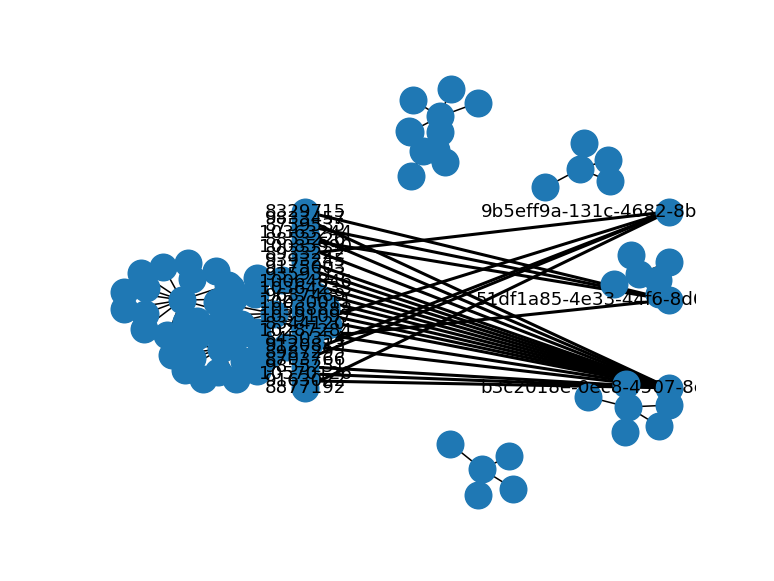

In [16]:
print(inventor[disconnected[1]]['nodes_PN'])


A = nx.Graph()
A.add_nodes_from(inventor[disconnected[1]]['nodes_PN'],bipartite=0)
A.add_nodes_from(inventor[disconnected[1]]['nodes_assignee'],bipartite=1)
A.add_edges_from(inventor[disconnected[1]]['edges'])
bipartite.is_bipartite(A)
edges = A.edges()
#nx.draw_networkx(A,pos = nx.drawing.layout.bipartite_layout(A, inventor[disconnected[1]]['nodes_PN']), width = 2)

In [73]:
A1 = sorted(nx.connected_components(A), key = len, reverse = True)
print(A1)

[{9687489, 'b3c2018e-0ec8-4507-8c2f-99ccf7e1c93e', 10030011, 10085990, 10364233, 10363244, 9120813, 9163022, 10064846, 10570126, 9359313, 9833457, 9855251, 10287284, 10568888, 10391097, 9175003, 9393245}, {8933222, 8877192, 8987295, 8703766, 8344120, '9b5eff9a-131c-4682-8bfd-856733f6a860'}, {8853226, 8759535, 8450354, 8329715, '51df1a85-4e33-44f6-8d64-078dd2e2c793'}]


<IPython.core.display.Javascript object>


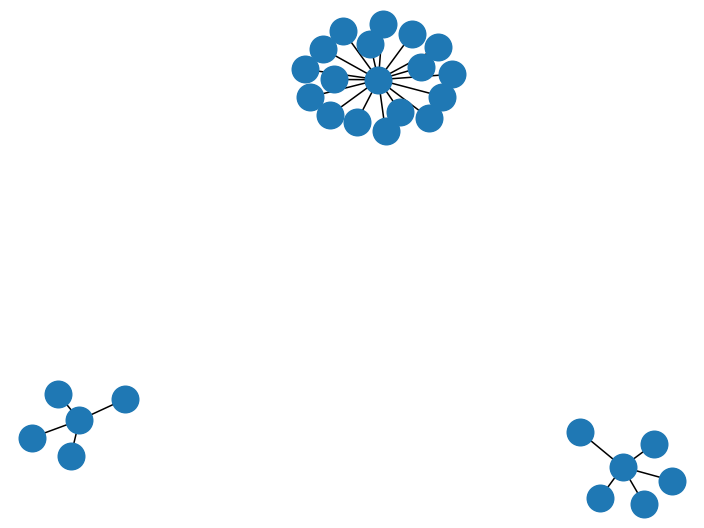

In [47]:
nx.draw(A)

In [19]:
dict_connected = {}
PN = []
for j in range(len(A1)):
    assignee = ''
    tmp = []
    for i in A1[j]:
        #print(type(i))
        if type(i) == str:
            assignee = i
        else:
            tmp.append(date[i])
    PN.append(tmp)
    #dict_connected.update({assignee:PN})

In [20]:
print(PN)

[[Timestamp('2016-06-16 00:00:00'), Timestamp('2014-03-17 00:00:00'), Timestamp('2017-11-01 00:00:00'), Timestamp('2018-08-22 00:00:00'), Timestamp('2018-08-08 00:00:00'), Timestamp('2014-12-01 00:00:00'), Timestamp('2014-09-04 00:00:00'), Timestamp('2017-08-28 00:00:00'), Timestamp('2019-03-05 00:00:00'), Timestamp('2011-05-24 00:00:00'), Timestamp('2017-05-22 00:00:00'), Timestamp('2016-02-11 00:00:00'), Timestamp('2018-06-13 00:00:00'), Timestamp('2019-07-10 00:00:00'), Timestamp('2018-08-27 00:00:00'), Timestamp('2015-01-23 00:00:00'), Timestamp('2015-09-10 00:00:00')], [Timestamp('2014-03-05 00:00:00'), Timestamp('2011-01-03 00:00:00'), Timestamp('2012-12-06 00:00:00'), Timestamp('2013-08-01 00:00:00'), Timestamp('2011-06-13 00:00:00')], [Timestamp('2011-03-04 00:00:00'), Timestamp('2011-02-16 00:00:00'), Timestamp('2011-03-21 00:00:00'), Timestamp('2012-03-02 00:00:00')]]


In [21]:
print(min(PN[0]), min(PN[1]),min(PN[2]))

2011-05-24 00:00:00 2011-01-03 00:00:00 2011-02-16 00:00:00


In [22]:
dict_connected.values()

dict_values([])

In [23]:
for pn in dict_connected.values():
    for p in pn:
        print(p)

In [24]:
min(date.values())

Timestamp('2011-01-03 00:00:00')

In [41]:
c = 0
for invt_id in disconnected:
    if c <10:
        print(invt_id, ':',inventor[invt_id]['nodes_PN'])
        #print(inventor[invt_id]['nodes_PN'][0])
        for i in range(len(inventor[invt_id]['nodes_PN'])):
            print(date[inventor[invt_id]['nodes_PN'][i]])
    c = c+1

fl:m_ln:divi-1 : [8212072, 8481598]
2011-01-03 00:00:00
2011-01-14 00:00:00
fl:a_ln:mjalli-1 : [8877192, 8759535, 8853226, 8450354, 9359313, 8344120, 8329715, 8987295, 8703766, 8933222, 10030011, 9163022, 9120813, 9175003, 9393245, 9855251, 9687489, 9833457, 10064846, 10085990, 10287284, 10363244, 10364233, 10391097, 10570126, 10568888]
2011-01-03 00:00:00
2011-02-16 00:00:00
2011-03-04 00:00:00
2011-03-21 00:00:00
2011-05-24 00:00:00
2011-06-13 00:00:00
2012-03-02 00:00:00
2012-12-06 00:00:00
2013-08-01 00:00:00
2014-03-05 00:00:00
2014-03-17 00:00:00
2014-09-04 00:00:00
2014-12-01 00:00:00
2015-01-23 00:00:00
2015-09-10 00:00:00
2016-02-11 00:00:00
2016-06-16 00:00:00
2017-05-22 00:00:00
2017-08-28 00:00:00
2017-11-01 00:00:00
2018-06-13 00:00:00
2018-08-08 00:00:00
2018-08-22 00:00:00
2018-08-27 00:00:00
2019-03-05 00:00:00
2019-07-10 00:00:00
fl:y_ln:tian-31 : [8877192, 8344120, 9199983, 10703759, 10874670]
2011-01-03 00:00:00
2011-06-13 00:00:00
2011-11-16 00:00:00
2017-11-16 00:0